# 한국 유튜브 인기 동영상 분석

In [674]:
# 기본 모듈 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import timedelta

pd.options.display.float_format = "{:.2f}".format #pandas 출력 포맷팅 참고(https://financedata.github.io/posts/pandas-display-format.html)

%matplotlib inline

In [675]:
# 한글 시각화
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [676]:
df = pd.read_csv("KR_youtube_trending_data.csv", parse_dates =["trending_date"], engine = "python")
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09 18:32,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12 09:00:00,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12 18:00,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12 09:00:00,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁..."
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10 18:54,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12 09:00:00,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN
3,3pI_L3-sMVg,???????????? 꽈뚜룹입니다.,2020-08-12 0:00,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12 09:00:00,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11 18:00,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12 09:00:00,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...


### 데이터 전처리

In [677]:
id_to_category = {}

with open("KR_category_id.json","r") as f:
    id_data = json.load(f)
    for category in id_data["items"]:
        id_to_category[category["id"]] = category["snippet"]["title"]

# id_to_category

df["categoryId"] = df["categoryId"].astype(str)
df.insert(5, "category", df["categoryId"].map(id_to_category))

In [678]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,category,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09 18:32,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,Entertainment,24,2020-08-12 09:00:00,보겸|bokyem,5947503,53326,105756,139946,https://i.ytimg.com/vi/uq5LClQN3cE/default.jpg,False,False,NaN
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12 18:00,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,Film & Animation,1,2020-08-12 09:00:00,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,https://i.ytimg.com/vi/I-ZbZCHsHD0/default.jpg,False,False,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁..."
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10 18:54,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,People & Blogs,22,2020-08-12 09:00:00,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,https://i.ytimg.com/vi/9d7jNUjBoss/default.jpg,False,False,NaN
3,3pI_L3-sMVg,???????????? 꽈뚜룹입니다.,2020-08-12 0:00,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,Entertainment,24,2020-08-12 09:00:00,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,https://i.ytimg.com/vi/3pI_L3-sMVg/default.jpg,False,False,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11 18:00,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,Music,10,2020-08-12 09:00:00,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,https://i.ytimg.com/vi/zrsBjYukE8s/default.jpg,False,False,MelOn http://kko.to/TWyXd7zYjSpotify https://s...


In [679]:
# 결측치 확인
df.isnull().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
category              158
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          2375
dtype: int64

In [680]:
# category가 결측치인 영상의 categoryId 값 확인
df['categoryId'].loc[df['category'].isnull() == True].value_counts()

29    158
Name: categoryId, dtype: int64

In [681]:
# category id가 29인 영상 확인
df[df['categoryId'] == '29'] 

,video_id,title,publishedAt,channelId,channelTitle,category,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
17,cOQEdUBpLjg,폭우로 인한 침수 상황시 대처 방법은? [행정안전부X사물궁이],2020-08-12 15:51,UCzteSXznVjwESizsCcSKSWw,행정안전부,NaN,29,2020-08-12 09:00:00,행정안전부|행안부|행안부장관|서울정부청사|광화문|지자체|안전|재난안전|행정서비스|공...,29603,1180,19,229,https://i.ytimg.com/vi/cOQEdUBpLjg/default.jpg,False,False,"#사물궁이 #집중호우 #대처법올해는 왜 폭우로 인한 피해가 유난히 심했는지, 그리고..."
150,cOQEdUBpLjg,폭우로 인한 침수 상황시 대처 방법은? [행정안전부X사물궁이],2020-08-12 15:51,UCzteSXznVjwESizsCcSKSWw,행정안전부,NaN,29,2020-08-13 09:00:00,행정안전부|행안부|행안부장관|서울정부청사|광화문|지자체|안전|재난안전|행정서비스|공...,71481,2213,55,372,https://i.ytimg.com/vi/cOQEdUBpLjg/default.jpg,False,False,"#사물궁이 #집중호우 #대처법올해는 왜 폭우로 인한 피해가 유난히 심했는지, 그리고..."
303,cOQEdUBpLjg,폭우로 인한 침수 상황시 대처 방법은? [행정안전부X사물궁이],2020-08-12 15:51,UCzteSXznVjwESizsCcSKSWw,행정안전부,NaN,29,2020-08-14 09:00:00,행정안전부|행안부|행안부장관|서울정부청사|광화문|지자체|안전|재난안전|행정서비스|공...,90819,2627,66,423,https://i.ytimg.com/vi/cOQEdUBpLjg/default.jpg,False,False,"#사물궁이 #집중호우 #대처법올해는 왜 폭우로 인한 피해가 유난히 심했는지, 그리고..."
476,cOQEdUBpLjg,폭우로 인한 침수 상황시 대처 방법은? [행정안전부X사물궁이],2020-08-12 15:51,UCzteSXznVjwESizsCcSKSWw,행정안전부,NaN,29,2020-08-15 09:00:00,행정안전부|행안부|행안부장관|서울정부청사|광화문|지자체|안전|재난안전|행정서비스|공...,101651,2873,69,457,https://i.ytimg.com/vi/cOQEdUBpLjg/default.jpg,False,False,"#사물궁이 #집중호우 #대처법올해는 왜 폭우로 인한 피해가 유난히 심했는지, 그리고..."
640,cOQEdUBpLjg,폭우로 인한 침수 상황시 대처 방법은? [행정안전부X사물궁이],2020-08-12 15:51,UCzteSXznVjwESizsCcSKSWw,행정안전부,NaN,29,2020-08-16 09:00:00,행정안전부|행안부|행안부장관|서울정부청사|광화문|지자체|안전|재난안전|행정서비스|공...,109819,2993,74,476,https://i.ytimg.com/vi/cOQEdUBpLjg/default.jpg,False,False,"#사물궁이 #집중호우 #대처법올해는 왜 폭우로 인한 피해가 유난히 심했는지, 그리고..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98507,eySbD1A9s3M,동지팥죽을 여러 번거로운 과정없이 안쳐주기만 하면 알아서 다 해주는 세상쉬운 팥죽끓...,2021-12-18 6:52,UCIV6JumWAbibVJAfCuJTYmg,CalBap-캘리포니아 건강밥상,NaN,29,2021-12-28 09:00:00,건강|건강요리|웰빙|맛있는 요리|쉽게할 수 있는 요리|요리|건강식|채식|채식요리|자...,221170,5225,0,149,https://i.ytimg.com/vi/eySbD1A9s3M/default.jpg,False,False,겨울이면 꼭 한번 해 먹고 싶은 팥죽!!다음 주면 밤이 가장 길다는 동지인데요따끈따...
98723,eySbD1A9s3M,동지팥죽을 여러 번거로운 과정없이 안쳐주기만 하면 알아서 다 해주는 세상쉬운 팥죽끓...,2021-12-18 6:52,UCIV6JumWAbibVJAfCuJTYmg,CalBap-캘리포니아 건강밥상,NaN,29,2021-12-29 09:00:00,건강|건강요리|웰빙|맛있는 요리|쉽게할 수 있는 요리|요리|건강식|채식|채식요리|자...,221641,5226,0,149,https://i.ytimg.com/vi/eySbD1A9s3M/default.jpg,False,False,겨울이면 꼭 한번 해 먹고 싶은 팥죽!!다음 주면 밤이 가장 길다는 동지인데요따끈따...
98929,eySbD1A9s3M,동지팥죽을 여러 번거로운 과정없이 안쳐주기만 하면 알아서 다 해주는 세상쉬운 팥죽끓...,2021-12-18 6:52,UCIV6JumWAbibVJAfCuJTYmg,CalBap-캘리포니아 건강밥상,NaN,29,2021-12-30 09:00:00,건강|건강요리|웰빙|맛있는 요리|쉽게할 수 있는 요리|요리|건강식|채식|채식요리|자...,222059,5237,0,149,https://i.ytimg.com/vi/eySbD1A9s3M/default.jpg,False,False,겨울이면 꼭 한번 해 먹고 싶은 팥죽!!다음 주면 밤이 가장 길다는 동지인데요따끈따...
98961,FW0DW4bnpG8,[단독영상] 부산 홈플러스 연산점 5층 주차장에서 차량 추락,2021-12-30 13:51,UCHMl6cx4Q1JsvTwAT2gA8Vw,부산일보,NaN,29,2021-12-31 09:00:00,[None],308898,882,0,479,https://i.ytimg.com/vi/FW0DW4bnpG8/default.jpg,False,False,??이것도 구독해주세요??부산일보 유튜브 구독하기 ☞ https://hoy.kr/2...


In [682]:
# 확인 결과, 29번은 '비영리/사회운동' 카테고리
df.loc[df['categoryId'] == '29', 'category'] = "Nonprofits & Activism"

In [683]:
# 중복 영상 제거
df = df.drop_duplicates(["video_id"])[:]

In [684]:
# 필요없는 column 제거
df.drop(['thumbnail_link', 'comments_disabled', 'ratings_disabled'], axis=1, inplace=True)

In [685]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,category,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09 18:32,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,Entertainment,24,2020-08-12 09:00:00,보겸|bokyem,5947503,53326,105756,139946,NaN
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12 18:00,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,Film & Animation,1,2020-08-12 09:00:00,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁..."
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10 18:54,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,People & Blogs,22,2020-08-12 09:00:00,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,NaN
3,3pI_L3-sMVg,???????????? 꽈뚜룹입니다.,2020-08-12 0:00,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,Entertainment,24,2020-08-12 09:00:00,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11 18:00,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,Music,10,2020-08-12 09:00:00,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,MelOn http://kko.to/TWyXd7zYjSpotify https://s...


In [686]:
# publishedAt, trending_date column type 변경 : datetime
df['publishedAt'] = pd.to_datetime(df['publishedAt'], format='%Y-%m-%d', errors='raise')
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%Y-%m-%d', errors='raise')

In [687]:
df.loc[df['title'].str.contains('M/V'), 'category'] = 'Music'

In [688]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13090 entries, 0 to 99182
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   video_id       13090 non-null  object        
 1   title          13090 non-null  object        
 2   publishedAt    13090 non-null  datetime64[ns]
 3   channelId      13090 non-null  object        
 4   channelTitle   13090 non-null  object        
 5   category       13090 non-null  object        
 6   categoryId     13090 non-null  object        
 7   trending_date  13090 non-null  datetime64[ns]
 8   tags           13090 non-null  object        
 9   view_count     13090 non-null  int64         
 10  likes          13090 non-null  int64         
 11  dislikes       13090 non-null  int64         
 12  comment_count  13090 non-null  int64         
 13  description    12746 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(8)
memory usage: 1.5+ MB


### EDA

In [689]:
df.describe()

,view_count,likes,dislikes,comment_count
count,13090.00,13090.00,13090.00,13090.00
mean,778004.75,51164.87,652.64,5908.43
std,2314793.98,251676.86,5824.92,58320.68
min,0.00,0.00,0.00,0.00
25%,169245.50,3540.25,64.00,406.00
50%,334963.00,7165.50,130.00,961.00
75%,700319.75,16767.25,289.00,2337.00
max,76805026.00,7110450.00,405428.00,3400571.00


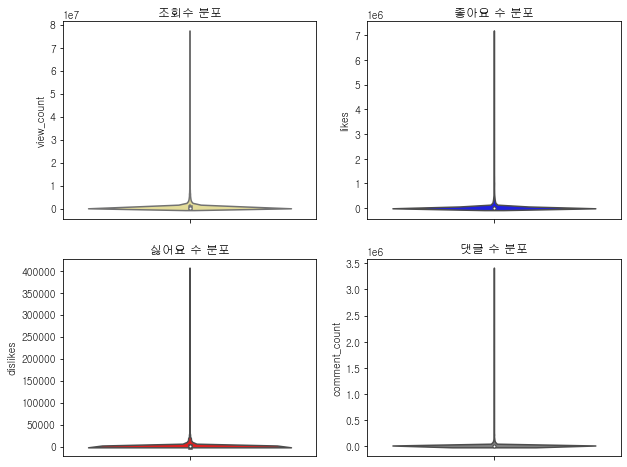

In [690]:
f,axes = plt.subplots(2,2,figsize=(10,8), sharex=True)

sns.violinplot(y=df['view_count'], color='khaki', ax=axes[0,0])
sns.violinplot(y=df['likes'], color='blue', ax=axes[0,1])
sns.violinplot(y=df['dislikes'], color='red', ax=axes[1,0])
sns.violinplot(y=df['comment_count'], color='gray', ax=axes[1,1])

axes[0, 0].title.set_text("조회수 분포")
axes[0, 1].title.set_text("좋아요 수 분포")
axes[1, 0].title.set_text("싫어요 수 분포")
axes[1, 1].title.set_text("댓글 수 분포")

plt.show()

In [691]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13090 entries, 0 to 99182
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   video_id       13090 non-null  object        
 1   title          13090 non-null  object        
 2   publishedAt    13090 non-null  datetime64[ns]
 3   channelId      13090 non-null  object        
 4   channelTitle   13090 non-null  object        
 5   category       13090 non-null  object        
 6   categoryId     13090 non-null  object        
 7   trending_date  13090 non-null  datetime64[ns]
 8   tags           13090 non-null  object        
 9   view_count     13090 non-null  int64         
 10  likes          13090 non-null  int64         
 11  dislikes       13090 non-null  int64         
 12  comment_count  13090 non-null  int64         
 13  description    12746 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(8)
memory usage: 1.5+ MB


#### 1. 인기 동영상에 등록된 영상의 카테고리 분포 (category)

In [692]:
# 인기 동영상에 등록된 영상 카테고리 수
category_count = pd.DataFrame(df['category'].value_counts())
category_count

,category
Entertainment,4486
People & Blogs,1865
Music,1416
Sports,1082
News & Politics,965
Comedy,731
Howto & Style,482
Film & Animation,458
Gaming,449
Education,295


In [693]:
# 하위 카테고리 영상들의 총 개수를 기타 카테고리에 합치기
category_count.loc['기타'] = category_count.loc[category_count['category'] < 270]['category'].sum()

In [694]:
# 하위 카테고리 제외
category_count = category_count.query("category > 270")

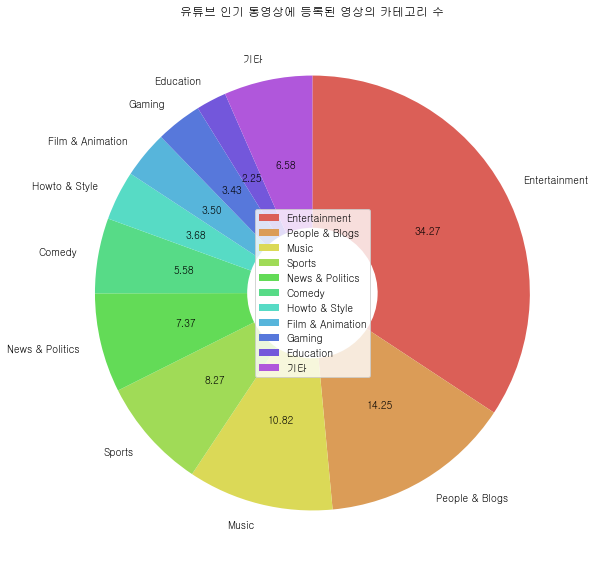

In [695]:
# 파이 차트로 시각화
plt.figure(figsize=(10,10))
plt.pie(category_count['category'], labels=category_count.index, 
        colors=sns.color_palette("hls", 13), autopct='%.2f',
        counterclock=False, startangle=90, wedgeprops={'width':0.7})
plt.title("유튜브 인기 동영상에 등록된 영상의 카테고리 수")
plt.legend(loc=10)
plt.show()

- Entertainment 카테고리의 영상들이 34.4%로 가장 많이 인기 동영상에 등록되었다.
- People & Blogs, Music, Sports 카테고리가 그 뒤를 이었다.

#### 2. 인기 동영상에 등록된 영상들의 조회수 분포 (view_count)

In [696]:
# 조회수 column의 기술통계
df['view_count'].describe()

count      13090.00
mean      778004.75
std      2314793.98
min            0.00
25%       169245.50
50%       334963.00
75%       700319.75
max     76805026.00
Name: view_count, dtype: float64

- 평균값이 중앙값보다 훨씬 큰 것을 보아 조회수는 오른쪽 꼬리가 긴 분포인 것으로 볼 수 있다.

In [697]:
# 조회수 구간별 조회수 분포
print("전체 데이터 {}건".format(len(df)) )
print("조회수 1000만 이상 : {}건, 전체의 {:.2f}%".format(len(df.loc[df["view_count"] >= 10000000]),len(df.loc[df["view_count"] >= 10000000]) / len(df) * 100))
print("조회수 100만 이상 : {}건, 전체의 {:.2f}%".format(len(df.loc[df["view_count"] >= 1000000]),len(df.loc[df["view_count"] >= 1000000]) / len(df) * 100))
print("조회수 10만 이상 : {}건, 전체의 {:.2f}%".format(len(df.loc[df["view_count"] >= 100000]),len(df.loc[df["view_count"] >= 100000]) / len(df) * 100))

전체 데이터 13090건
조회수 1000만 이상 : 104건, 전체의 0.79%
조회수 100만 이상 : 2024건, 전체의 15.46%
조회수 10만 이상 : 11641건, 전체의 88.93%


<AxesSubplot:xlabel='view_count', ylabel='Count'>

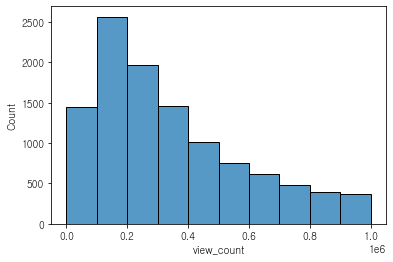

In [698]:
# 조회수 100만 이하 영상들의 조회수 분포
sns.histplot(df['view_count'].loc[df['view_count'] <= 1000000], bins=10)

In [699]:
# 조회수 1000만 이상 영상의 카테고리 분포
ten_mil_category = df[df['view_count'] >= 10000000]['category'].value_counts(ascending=True)
ten_mil_category

People & Blogs           1
News & Politics          1
Gaming                   2
Education                2
Science & Technology     6
Entertainment            7
Music                   85
Name: category, dtype: int64

<AxesSubplot:>

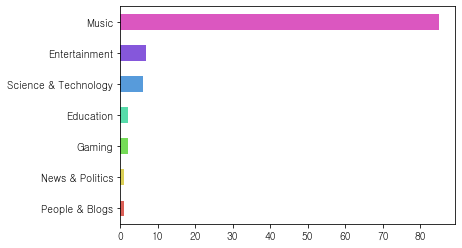

In [700]:
# 1000만 이상 영상의 카테고리 분포 시각화
ten_mil_category.plot(kind='barh', color=sns.color_palette("hls", 7))

- 천만 이상의 조회수를 기록한 영상은 대부분 Music Category임을 알 수 있다.

#### 3. 인기 동영상에 많이 등록된 채널 (channelTitle)

In [701]:
df['channelTitle'].value_counts()

SPOTV          131
짤툰              87
BANGTANTV       65
채널 십오야          61
총몇명             56
              ... 
COWAY            1
원더풀 인생후반전        1
금융인 강은호          1
경기일보 경기TV        1
헤어몬 Hairmon      1
Name: channelTitle, Length: 2651, dtype: int64

In [702]:
# 인기 동영상에 가장 많이 등록된 채널 TOP10
channel_count = pd.DataFrame(df['channelTitle'].value_counts())
channel_count.head(10)

,channelTitle
SPOTV,131
짤툰,87
BANGTANTV,65
채널 십오야,61
총몇명,56
스포츠타임,54
런닝맨 - 스브스 공식 채널,51
유 퀴즈 온 더 튜브,50
워크맨-Workman,50
CBS 김현정의 뉴스쇼,49


#### 4. 변수 간 상관관계 

<AxesSubplot:>

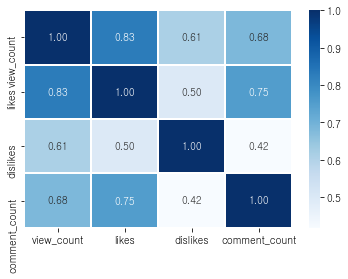

In [703]:
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidth=1, cmap='Blues')

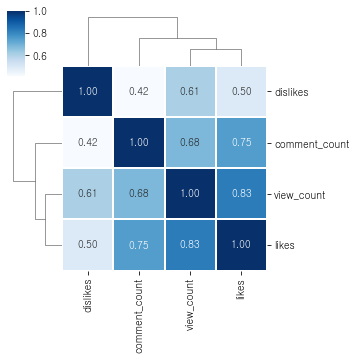

In [704]:
sns.clustermap(df.corr(), figsize=(5,5), annot=True, fmt=".2f", linewidth=1, cmap='Blues')

### 시계열 예측 전처리

In [705]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,category,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09 18:32:00,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,Entertainment,24,2020-08-12 09:00:00,보겸|bokyem,5947503,53326,105756,139946,NaN
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12 18:00:00,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,Film & Animation,1,2020-08-12 09:00:00,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,963384,28244,494,3339,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁..."
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10 18:54:00,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,People & Blogs,22,2020-08-12 09:00:00,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,2950885,17974,68898,50688,NaN
3,3pI_L3-sMVg,???????????? 꽈뚜룹입니다.,2020-08-12 00:00:00,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,Entertainment,24,2020-08-12 09:00:00,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,1743374,36893,1798,8751,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11 18:00:00,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,Music,10,2020-08-12 09:00:00,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,3433885,353337,9763,23405,MelOn http://kko.to/TWyXd7zYjSpotify https://s...


In [706]:
df['category'].unique()

array(['Entertainment', 'Film & Animation', 'People & Blogs', 'Music',
       'Comedy', 'Education', 'News & Politics', 'Sports',
       'Nonprofits & Activism', 'Gaming', 'Travel & Events',
       'Pets & Animals', 'Science & Technology', 'Howto & Style',
       'Autos & Vehicles'], dtype=object)

In [707]:
# 태그 개수 column 생성
df["tag_count"] = df["tags"].apply(lambda x : len(x.split("|")) if x != "[none]" else 0)

In [708]:
# title 길이 column 생성
df["title_length"] = df["title"].apply(lambda x : len(str(x)) if pd.isnull(x) == False  else 0 )

In [709]:
# description 길이 column 생성
df["description_length"] = df["description"].apply(lambda x : len(str(x)) if pd.isnull(x) == False  else 0 )

In [710]:
df.drop(['video_id', 'tags', 'channelId', 'categoryId', 'publishedAt', 'description', 'dislikes'], axis=1, inplace=True)
df.head()

,title,channelTitle,category,trending_date,view_count,likes,comment_count,tag_count,title_length,description_length
0,안녕하세요 보겸입니다,보겸 BK,Entertainment,2020-08-12 09:00:00,5947503,53326,139946,2,11,0
1,부락토스의 계획 [총몇명 프리퀄],총몇명,Film & Animation,2020-08-12 09:00:00,963384,28244,3339,6,18,496
2,평생 반성하면서 살겠습니다.,양팡 YangPang,People & Blogs,2020-08-12 09:00:00,2950885,17974,50688,27,15,0
3,???????????? 꽈뚜룹입니다.,꽈뚜룹 Quaddurup,Entertainment,2020-08-12 09:00:00,1743374,36893,8751,12,20,35
4,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,JYP Entertainment,Music,2020-08-12 09:00:00,3433885,353337,23405,13,48,524


In [711]:
df['trending_date'] = pd.to_datetime(df['trending_date']).dt.date
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%Y-%m-%d', errors='raise')
df.head()

,title,channelTitle,category,trending_date,view_count,likes,comment_count,tag_count,title_length,description_length
0,안녕하세요 보겸입니다,보겸 BK,Entertainment,2020-08-12,5947503,53326,139946,2,11,0
1,부락토스의 계획 [총몇명 프리퀄],총몇명,Film & Animation,2020-08-12,963384,28244,3339,6,18,496
2,평생 반성하면서 살겠습니다.,양팡 YangPang,People & Blogs,2020-08-12,2950885,17974,50688,27,15,0
3,???????????? 꽈뚜룹입니다.,꽈뚜룹 Quaddurup,Entertainment,2020-08-12,1743374,36893,8751,12,20,35
4,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,JYP Entertainment,Music,2020-08-12,3433885,353337,23405,13,48,524


In [712]:
df.drop('channelTitle', axis=1, inplace=True)

In [713]:
df

,title,category,trending_date,view_count,likes,comment_count,tag_count,title_length,description_length
0,안녕하세요 보겸입니다,Entertainment,2020-08-12,5947503,53326,139946,2,11,0
1,부락토스의 계획 [총몇명 프리퀄],Film & Animation,2020-08-12,963384,28244,3339,6,18,496
2,평생 반성하면서 살겠습니다.,People & Blogs,2020-08-12,2950885,17974,50688,27,15,0
3,???????????? 꽈뚜룹입니다.,Entertainment,2020-08-12,1743374,36893,8751,12,20,35
4,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,Music,2020-08-12,3433885,353337,23405,13,48,524
...,...,...,...,...,...,...,...,...,...
99158,내 동생이 곧 죽는다 [기시니 스릴러툰],Film & Animation,2022-01-01,307113,3948,350,2,22,937
99163,정동원 우추총동원 여러분들과 함께하는 첫 단독 콘서트! ????,People & Blogs,2022-01-01,156685,9388,756,1,35,99
99164,The Brawlies - Brawl Stars Community Award Show!,Gaming,2022-01-01,5114854,342366,35908,13,48,3665
99172,2022 Weverse Con COUNTDOWN SPECIAL,Music,2022-01-01,807770,83211,1238,4,34,0


In [714]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13090 entries, 0 to 99182
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               13090 non-null  object        
 1   category            13090 non-null  object        
 2   trending_date       13090 non-null  datetime64[ns]
 3   view_count          13090 non-null  int64         
 4   likes               13090 non-null  int64         
 5   comment_count       13090 non-null  int64         
 6   tag_count           13090 non-null  int64         
 7   title_length        13090 non-null  int64         
 8   description_length  13090 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 1022.7+ KB


### 카테고리 분할

1. Entertainment

In [814]:
df_entertainment = df[df['category'] == 'Entertainment']

In [815]:
df_entertainment['view_count'].describe()

count       4486.00
mean      588992.57
std       860551.64
min            0.00
25%       194017.00
50%       361693.50
75%       701995.00
max     17880955.00
Name: view_count, dtype: float64

In [816]:
df_entertainment.drop(df_entertainment[df_entertainment['view_count'] > 1000000].index, inplace=True)

C:\Users\kms10\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [817]:
df_entertainment.sort_values(by='view_count', ascending=False).head()

,title,category,trending_date,view_count,likes,comment_count,tag_count,title_length,description_length
17360,BTS performs ‘Dynamite’ on ‘GMA3’,Entertainment,2020-11-24,998725,151319,5182,11,33,50
62164,[놀면 뭐하니? 정품버전] MSG워너비 M.O.M - 바라만 본다 완곡! (Hang...,Entertainment,2021-06-28,996347,24641,3550,34,81,238
32154,말도 안 되는 요구만 하는 노답 전남편♨ 연락 끊어야 할까요? [무엇이든 물어보살]...,Entertainment,2021-02-08,996039,6328,1864,10,66,293
4223,KBS News9 Interview with BTS [Subs / 2020.09.10],Entertainment,2020-09-11,995074,149189,15152,61,48,426
91561,엄마 죄송해요. 철 없는 사춘기 시절 부끄러웠던 과거 #shorts,Entertainment,2021-11-22,993991,24682,305,1,37,0


In [818]:
df_entertainment = df_entertainment.sort_values(by='trending_date')

In [819]:
df_entertainment = df_entertainment.set_index("trending_date")
df_entertainment.head()

,title,category,view_count,likes,comment_count,tag_count,title_length,description_length
trending_date,,,,,,,,
2020-08-12,진심으로 사과드립니다. 죄송합니다.,Entertainment,659743,13040,18286,1,19,0
2020-08-12,섬진강 범람...???? ????????,Entertainment,156824,1024,643,9,22,165
2020-08-12,[ENG] BTS·EXO·워너원·트와이스·NCT·AB6IX...경호원이 가장 힘들었...,Entertainment,704318,27922,1500,43,97,837
2020-08-12,[리얼:타임:러브 3] 공식 티저 Official TEASER (SUB),Entertainment,276245,11245,1242,33,40,229
2020-08-12,16화#하이라이트#김수현X서예지 눈물나지만 괜찮아!해피 앤딩이야♡ | 사이코지만 괜...,Entertainment,803454,12492,1707,8,55,169


In [820]:
df_entertainment = df_entertainment.resample('w').sum()
df_entertainment

,view_count,likes,comment_count,tag_count,title_length,description_length
trending_date,,,,,,
2020-08-16,16801421,516645,77140,884,2268,14031
2020-08-23,16732787,668995,64556,1249,2677,19807
2020-08-30,13498128,427496,51927,1546,2940,21058
2020-09-06,14024674,400514,43578,1338,2724,16903
2020-09-13,16621110,489758,57457,1362,3038,16751
...,...,...,...,...,...,...
2021-12-05,19342645,489972,35473,795,2107,14545
2021-12-12,24726976,770899,53880,1418,2806,26137
2021-12-19,17433567,450568,40104,989,2511,19549


In [821]:
df_entertainment['view_count'].describe()

count         73.00
mean    19316929.01
std      3892227.50
min     11217760.00
25%     16732787.00
50%     19342645.00
75%     21417847.00
max     30305997.00
Name: view_count, dtype: float64

In [822]:
from sklearn.preprocessing import MinMaxScaler

df_entertainment.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['view_count', 'likes', 'comment_count', 'tag_count', 'title_length', 'description_length']
df_entertainment_scaled = scaler.fit_transform(df_entertainment[scale_cols])
df_entertainment_scaled = pd.DataFrame(df_entertainment_scaled)
df_entertainment_scaled.columns = scale_cols
df_entertainment_scaled.index = df_entertainment.index
df_entertainment_scaled

,view_count,likes,comment_count,tag_count,title_length,description_length
trending_date,,,,,,
2020-08-16,0.29,0.21,0.53,0.11,0.26,0.17
2020-08-23,0.29,0.33,0.40,0.38,0.42,0.43
2020-08-30,0.12,0.14,0.27,0.60,0.53,0.48
2020-09-06,0.15,0.12,0.18,0.45,0.44,0.30
2020-09-13,0.28,0.19,0.33,0.47,0.57,0.29
...,...,...,...,...,...,...
2021-12-05,0.43,0.19,0.09,0.05,0.20,0.19
2021-12-12,0.71,0.41,0.29,0.51,0.47,0.71
2021-12-19,0.33,0.16,0.14,0.19,0.36,0.41


In [823]:
train = df_entertainment_scaled[:'2021-10']
test = df_entertainment_scaled['2021-11':]

In [824]:
def make_dataset(data, label, window_size):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [825]:
from sklearn.model_selection import train_test_split

feature_cols = ['likes', 'comment_count', 'tag_count', 'title_length', 'description_length']
label_cols = ['view_count']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((35, 20, 5), (9, 20, 5))

In [826]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((9, 5), (9, 1))

In [827]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((0,), (0,))

In [828]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation = 'relu',
               return_sequences=False)
          )

model.add(Dense(1))

In [829]:
import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/200
1/3 [=========>....................] - ETA: 3s - loss: 0.2321
Epoch 00001: val_loss improved from inf to 0.11537, saving model to model\tmp_checkpoint.h5
3/3 [==============================] - 2s 158ms/step - loss: 0.2837 - val_loss: 0.1154
Epoch 2/200
1/3 [=========>....................] - ETA: 0s - loss: 0.2846
Epoch 00002: val_loss improved from 0.11537 to 0.10827, saving model to model\tmp_checkpoint.h5
3/3 [==============================] - 0s 37ms/step - loss: 0.2714 - val_loss: 0.1083
Epoch 3/200
1/3 [=========>....................] - ETA: 0s - loss: 0.2688
Epoch 00003: val_loss improved from 0.10827 to 0.10203, saving model to model\tmp_checkpoint.h5
3/3 [==============================] - 0s 39ms/step - loss: 0.2602 - val_loss: 0.1020
Epoch 4/200
1/3 [=========>....................] - ETA: 0s - loss: 0.2627
Epoch 00004: val_loss improved from 0.10203 to 0.09596, saving model to model\tmp_checkpoint.h5
3/3 [==============================] - 0s 39ms/step - loss: 0.250

In [830]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

RMSE = mean_squared_error(test_label, pred)**0.5
r2 = r2_score(test_label, pred)

print('RMSE: %.3f' % RMSE)
print('R-Squared: %.3f' % r2)

2. Music

In [350]:
df_music = df[df['category'] == 'Music']
df_music = df_music.sort_values(by='trending_date')
df_music.drop('category', axis=1, inplace=True)
df_music = df_music.set_index("trending_date")
df_music.resample('d').sum()

,view_count,likes,comment_count,tag_count,title_length,description_length
trending_date,,,,,,
2020-08-12,117954285,6639734,717191,409,935,15066
2020-08-13,3015947,572793,38858,60,280,1691
2020-08-14,5158086,1063599,107584,151,290,1294
2020-08-15,1306083,110708,9095,24,120,1224
2020-08-16,2604380,384171,13122,47,26,311
...,...,...,...,...,...,...
2021-12-28,830409,8979,1636,37,82,207
2021-12-29,141606,4660,329,5,27,105
2021-12-30,4511668,397252,22930,42,82,1099


In [241]:
y = df_entertainment['view_count']
X = df_entertainment.drop(columns='view_count')

train = df_entertainment[:'2021-11']
test = df_entertainment['2021-12':]

X_train = X[:'2021-11']
y_train = y[:'2021-11']
X_test = X['2021-12':]
y_test = y['2021-12':]

In [242]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

In [243]:
X_train

,title,likes,comment_count,tag_count,title_length,description_length
trending_date,,,,,,
2020-08-12,안녕하세요 보겸입니다,53326,139946,2,11,0
2020-08-12,24시간 동안 한가지 색 음식만 먹기! 누가 마지막까지 먹는가 분홍색 VS 보라색 ...,597,88,8,69,860
2020-08-12,TREASURE - 'BOY' M/V,1447196,335063,42,20,1845
2020-08-12,이게 왜 진짜야..? 실제 있었던 일인데도 주작같은 황당한 실화 TOP10,13347,2524,20,41,206
2020-08-12,멸치국수 천원??전메뉴 5개 다먹어도 6500원.. 두번 먹었습니다!!,14089,2175,1,39,274
...,...,...,...,...,...,...
2021-11-29,친구네 집에서 요리를 했는데요 아기들이 많이 컸어요 그런데 고기가 너무 두꺼워서 걱...,7126,535,1,55,1434
2021-11-30,"[술꾼도시여자들] 한선화의 수술 날, 결국 무너진 이선빈과 정은지. 그리고 유서",9456,386,29,44,169
2021-11-30,[#2021MAMA] Wanna One X MAMA [ENG],49415,5211,32,34,837


In [244]:
model = Sequential()
model.add(LSTM(16, 
               input_shape=(X_train.shape[0], X_train.shape[1]), 
               return_sequences=False))

model.add(Dense(1))

In [245]:
pred = model.predict(y_test)

pred.shape

ValueError: in user code:

    File "C:\Users\kms10\anaconda3\lib\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\kms10\anaconda3\lib\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\kms10\anaconda3\lib\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\kms10\anaconda3\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "C:\Users\kms10\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\kms10\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 213, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_3" (type Sequential).
    
    Input 0 of layer "lstm_1" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 1)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 1), dtype=int64)
      • training=False
      • mask=None


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

In [ ]:
forecasting_model = VAR(train)
results = forecasting_model.fit(3)

In [ ]:
prediction = results.forecast(test.values, len(test))
prediction

In [ ]:
predictions = prediction[:,0]
predictions

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_result_entertain